In [1]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd

In [2]:
# Load the dataset
df_fake = pd.read_csv("/content/drive/MyDrive/Real Fake News dataset/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Real Fake News dataset/True.csv")
df_fake["label"] = 0
df_true["label"] = 1

In [3]:
df = pd.concat([df_fake, df_true]).sample(frac=1).reset_index(drop=True)


In [4]:
# Use title or text
texts = df["title"].values
labels = df["label"].values

In [5]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
inputs = tokenizer(list(texts), return_tensors="tf", padding=True, truncation=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [6]:
input_ids_np = inputs['input_ids'].numpy()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(input_ids_np, labels, test_size=0.2)


In [8]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=50)

Epoch 1/3
116/719 [===>..........................] - ETA: 4:03:23 - loss: 0.7702 - accuracy: 0.4743

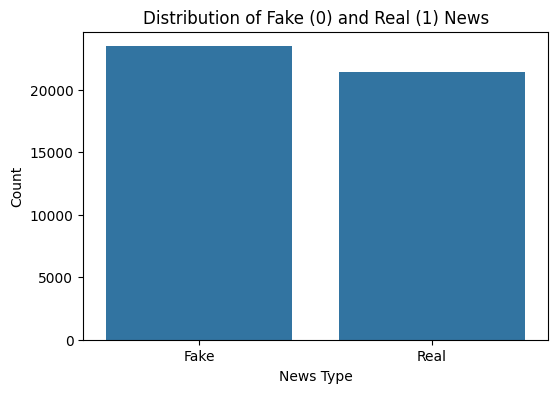

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

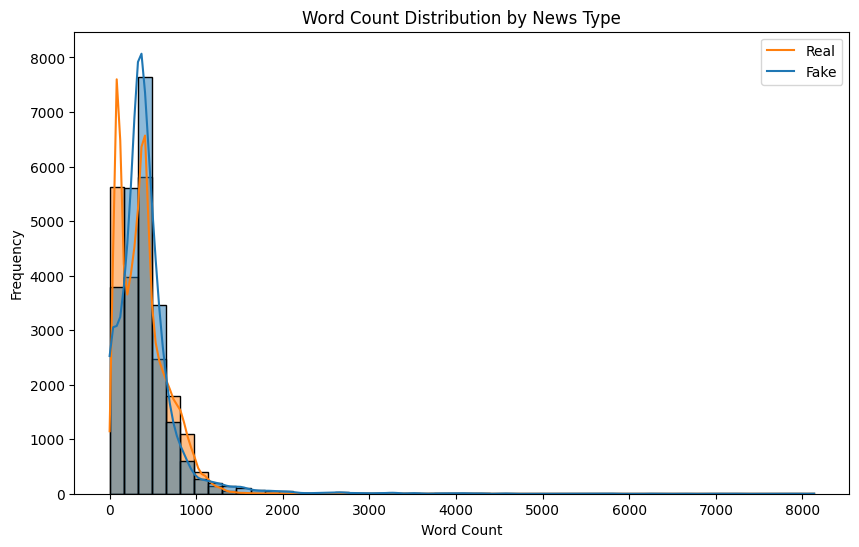

In [12]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True)
plt.title("Word Count Distribution by News Type")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(labels=['Real', 'Fake'])
plt.show()


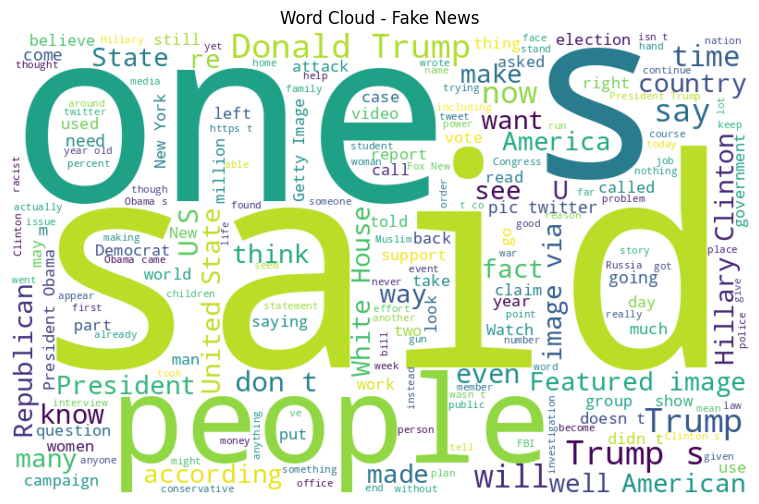

In [14]:
from wordcloud import WordCloud
fake_words = ' '.join(df[df['label']==0]['text'])
fake_cloud = WordCloud(width=800, height=500, background_color='white').generate(fake_words)

plt.figure(figsize=(10,6))
plt.imshow(fake_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()

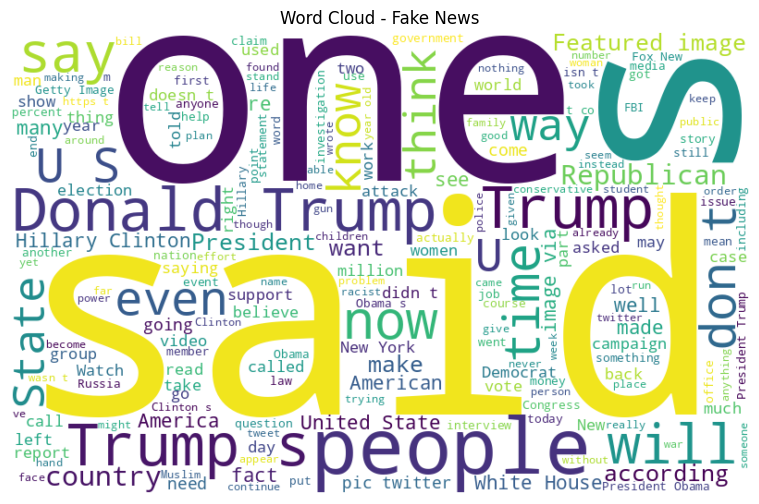

In [15]:
fake_words = ' '.join(df[df['label']==0]['text'])
fake_cloud = WordCloud(width=800, height=500, background_color='white').generate(fake_words)

plt.figure(figsize=(10,6))
plt.imshow(fake_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()


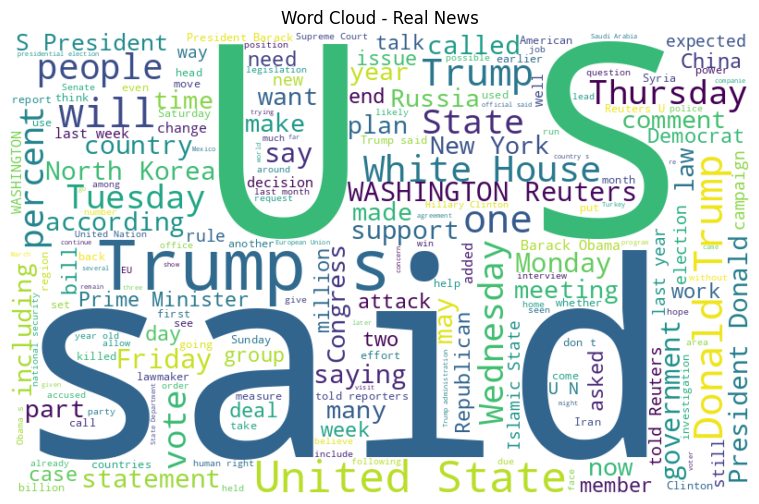

In [16]:
real_words = ' '.join(df[df['label']==1]['text'])
real_cloud = WordCloud(width=800, height=500, background_color='white').generate(real_words)

plt.figure(figsize=(10,6))
plt.imshow(real_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Real News")
plt.show()


In [16]:
model.fit(
    x={'input_ids': X_train}, y=y_train,
    validation_split=0.1,
    epochs=3,
    batch_size=16
)
